## Analysis by Flight Hour and Day

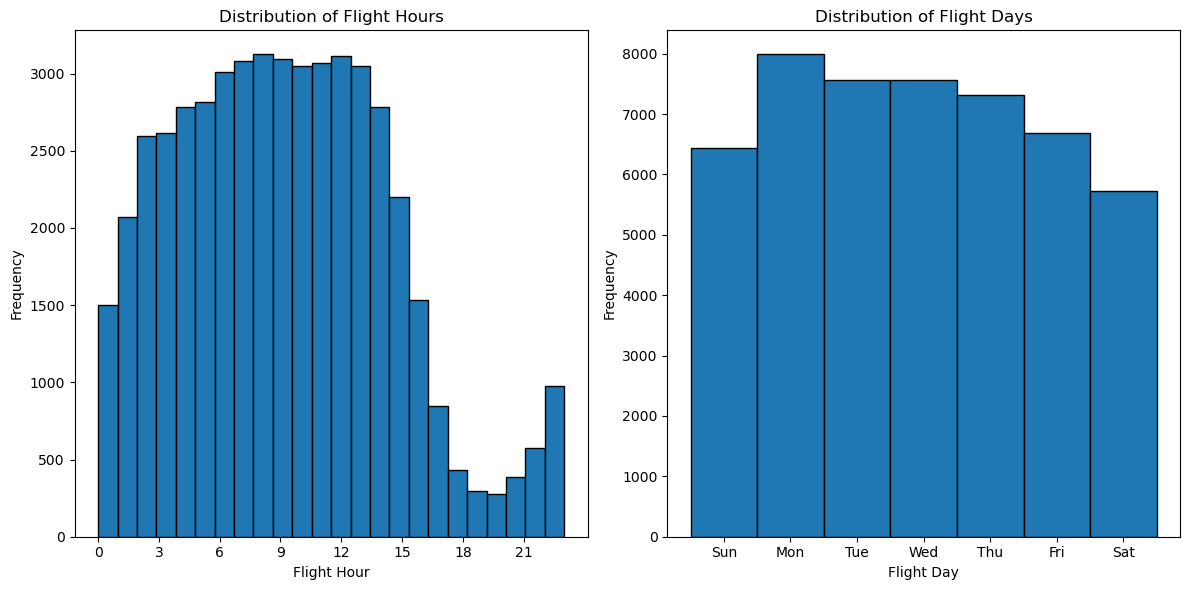

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# import dataset
df = pd.read_csv('updated_passengers.csv')

# declare variables
flight_hour_data = df['flight_hour']

# chronologically rearrange flight_day data 
days_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
flight_day_data = df['flight_day'].value_counts().reindex(days_order)

# use histogram to visualize distribution
plt.figure(figsize=(12, 6))

# histogram for flight_hour
plt.subplot(1, 2, 1)
plt.hist(flight_hour_data, bins=24, edgecolor='k')
plt.xlabel('Flight Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Hours')

# set x-axis ticks at intervals of 3
plt.xticks(range(0, 24, 3))

# histogram for flight_day
plt.subplot(1, 2, 2)
plt.bar(flight_day_data.index, flight_day_data.values, width=1, edgecolor='k')
plt.xlabel('Flight Day')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Days')

# display histograms
plt.tight_layout()
plt.show()

## Analysis of Booking Completion

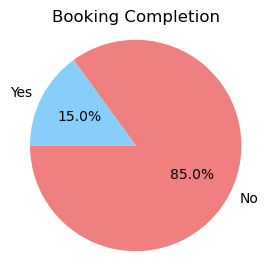

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updated_passengers.csv")

count_no = df['booking_complete'].value_counts()[0]
count_yes = df['booking_complete'].value_counts()[1]

# Data for the pie chart
labels = ['No', 'Yes']
sizes = [count_no, count_yes]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0) 

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=180)

# Add a title
plt.title('Booking Completion')

# Display the pie chart
plt.axis('equal') 
plt.show()

#### Booking Completion and Origin

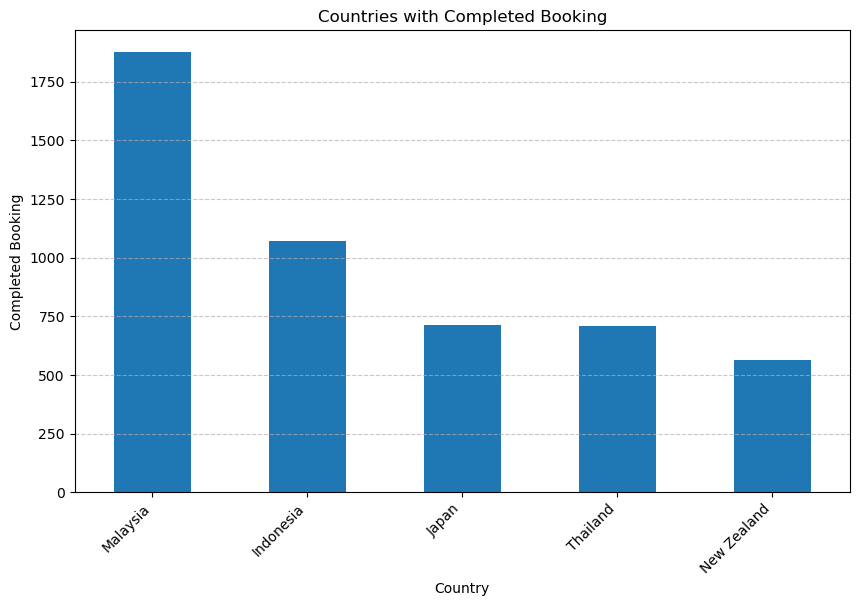

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("updated_passengers.csv")

# Filter the DataFrame to include only rows where "booking_completion" is 1
completed_bookings = df[df["booking_complete"] == 1]

# Group the data by "booking_origin" and count the occurrences of each country
country_counts = completed_bookings["booking_origin"].value_counts().head(5)

# Plot the bar graph
plt.figure(figsize=(10, 6))
country_counts.plot(kind="bar")
plt.title("Countries with Completed Booking")
plt.xlabel("Country")
plt.ylabel("Completed Booking")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Booking Completion and Sales Channel

<Figure size 800x600 with 0 Axes>

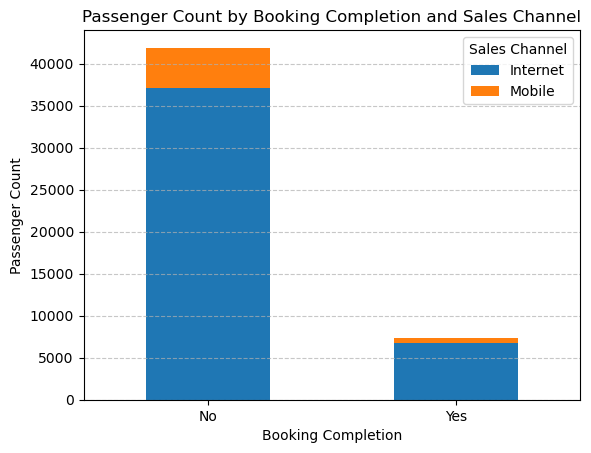

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("updated_passengers.csv")

# Map 0 to "No" and 1 to "Yes" in the "booking_completion" column
df["booking_completion"] = df["booking_complete"].replace({0: "No", 1: "Yes"})

# Group the data by "booking_completion" and "sales_channel" and count the number of passengers for each combination
booking_counts = df.groupby(["booking_completion", "sales_channel"]).size()

# Reshape the data to create a new DataFrame with "booking_completion" as columns and "sales_channel" as index
booking_counts = booking_counts.unstack(fill_value=0)

# Plot the bar graph
plt.figure(figsize=(8, 6))
booking_counts.plot(kind="bar", stacked=True)
plt.title("Passenger Count by Booking Completion and Sales Channel")
plt.xlabel("Booking Completion")
plt.ylabel("Passenger Count")
plt.xticks(rotation=0)
plt.legend(title="Sales Channel", loc="upper right", labels=["Internet", "Mobile"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(len(booking_counts.index)), booking_counts.index)  # Set the ticks explicitly
plt.show()

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset using pandas
df = pd.read_csv("updated_passengers.csv")

# Create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['sales_channel'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

# Set the significance level (alpha)
significance_level = 0.05

# Compare p-value with significance level
if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

#Accept the null hypothesis (has correlation)

Chi-square test statistic: 76.00886040678569
P-value: 2.8239477004200088e-18
The results are statistically significant at the 0.05 level.


#### Booking Completion and Purchase Lead

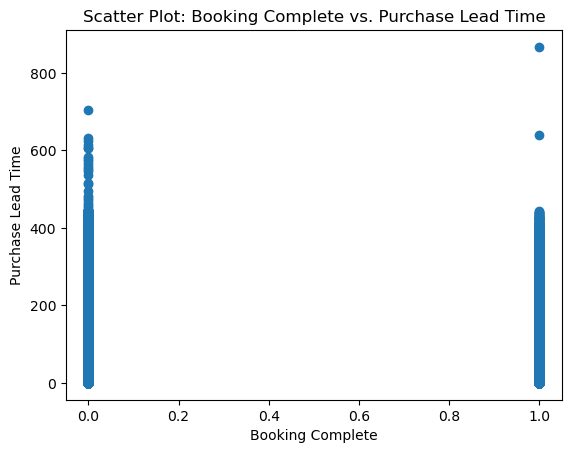

Point-Biserial Correlation Coefficient: -0.022186292753709095
P-value: 8.408536616078643e-07
The results are statistically significant at the 0.05 level.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the data set
data = pd.read_csv("updated_passengers.csv")

# Step 2: Calculate the point-biserial correlation
point_biserial_corr, p_value = stats.pointbiserialr(data["booking_complete"], data["purchase_lead"])

# Step 3: Create a scatter plot
plt.scatter(data["booking_complete"], data["purchase_lead"])
plt.xlabel("Booking Complete")
plt.ylabel("Purchase Lead Time")
plt.title("Scatter Plot: Booking Complete vs. Purchase Lead Time")
plt.show()

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

#significant, but weak negative correlation

#### Booking Completion and Trip Type

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset using pandas
df = pd.read_csv("updated_passengers.csv")

# Create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['trip_type'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

# Set the significance level (alpha)
significance_level = 0.05

# Compare p-value with significance level
if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

#Accept the null hypothesis (has correlation)

Chi-square test statistic: 40.153921771563525
P-value: 1.908475872822034e-09
The results are statistically significant at the 0.05 level.


## Analysis by Sales Channel

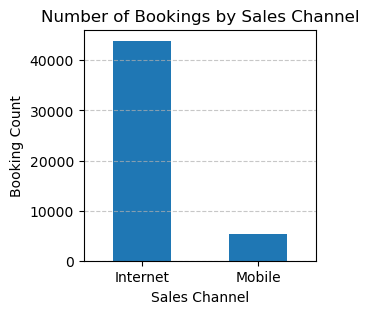

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updated_passengers.csv")

# Use the `groupby` method to group the data by "sales_channel" and count the number of bookings for each channel
booking_counts = df.groupby("sales_channel").size()

plt.figure(figsize=(3, 3))
booking_counts.plot(kind="bar")
plt.title("Number of Bookings by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Booking Count")
plt.xticks(rotation=0) 
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

## Analysis by Flight Hour and Day

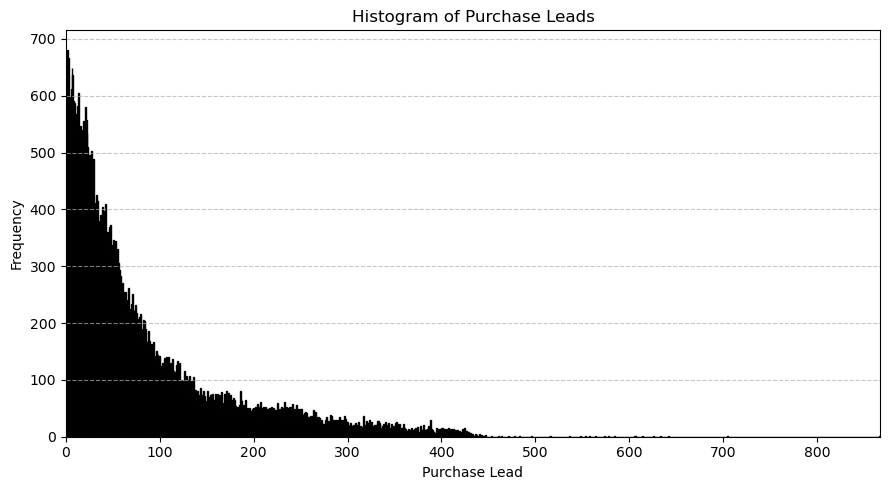

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("updated_passengers.csv")

purchase_lead_data = data['purchase_lead']

# Define the number of bins for the histogram
num_bins = df['purchase_lead'].max()

plt.figure(figsize=(9, 5))
plt.hist(purchase_lead_data, bins=num_bins, color='skyblue', edgecolor='black')

plt.xlabel('Purchase Lead')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Leads')

highest_value = df['purchase_lead'].max()
plt.xlim(0, highest_value)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 

plt.show()